<a href="https://colab.research.google.com/github/DkCodeProjct/AI_Projects..-/blob/main/Ai_Projects_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Andrej Karpathy

##  The spelled-out intro to neural networks and backpropagation: building micrograd

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP



In [2]:
 !pip install micrograd

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

In [61]:

class Value:
    def __init__(self, data, _childern=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None  # default is a no-op
        self._prev = set(_childern)    # previous nodes in the graph
        self._op = _op                 # operation that produced this node
        self.label = label             # node label for visualization

    def __repr__(self):
        return f'Value(data={self.data})'

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        output = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad
        output._backward = _backward
        return output

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad
            other.grad += self.data * output.grad
        output._backward = _backward
        return output


    # Power Rule:
    #     d/dx*x**n = n*x**n-1
    def __pow__(self, other):
        assert isinstance(other, (int, float)),  "only suport int/flot for now"
        out = Value(self.data ** other, (self, ), f'**{other}')

        def _backward():
            self.grad = (other * self.data**(other-1)) * out.grad # power rule
        out._backward = _backward
        return out


    def __rmul__(self, other):
        return self * other


    def __truediv__(self, other):
        return self * other**-1


    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)


    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        output = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * output.grad
        output._backward = _backward
        return output


    def expo(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.grad += out.grad * out.data
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        # Build the topological order
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)

        buildTopo(self)


        self.grad = 1.0
        for node in reversed(topo):
            node._backward()





In [57]:

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a+b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; label='L'
# printing val
#d
#d._prev
#d1 = a.__add__(b).__mul__(c)
#d1
#d._op
L

Value(data=-18.0)

In [5]:

from graphviz import Digraph


In [6]:

def trace(rt):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(rt)
    return nodes, edges
def drawDot(rt):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(rt)

    for n in nodes:
        vid = str(id(n))
        # Check if the label exists and format it properly
        label_text = f'{n.label} | data {n.data:.4f} | grad {n.grad:.4f}' if n.label else f'data {n.data:.4f} | grad {n.grad:.4f}'

        dot.node(name=vid, label=f'{{{label_text}}}', shape='record')

        if n._op:
            dot.node(name=vid + n._op, label=f'{n._op}')
            dot.edge(vid + n._op, vid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


##Taking Derivatives
###   using The Chain Rule

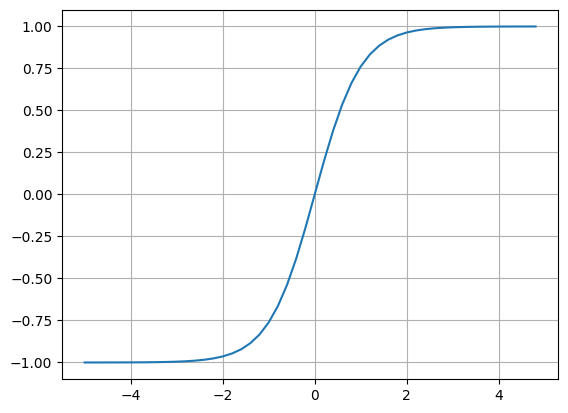

In [11]:
#Activations And BackProb

# Activation tanh
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

In [50]:
#Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0,label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.7, label='b')
### // x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+x2w2'
n = x1w1x2w2 + b; n.label='n'
output = n.tanh(); label='o'


#Using _backward ....

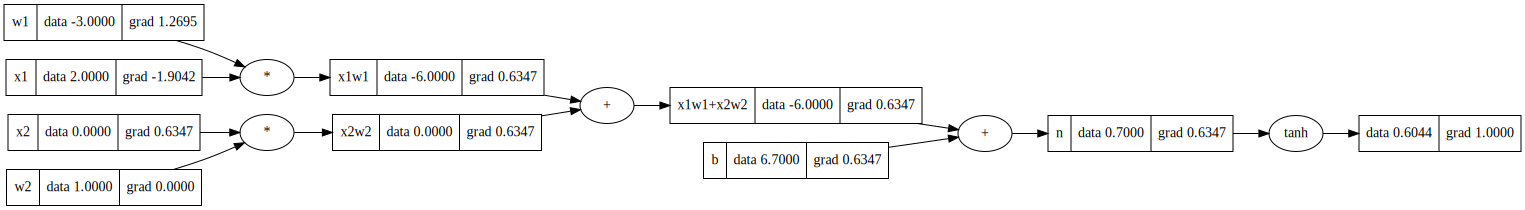

In [51]:
output.backward()
drawDot(output)

# Apply Backprop Using Topological Sort..


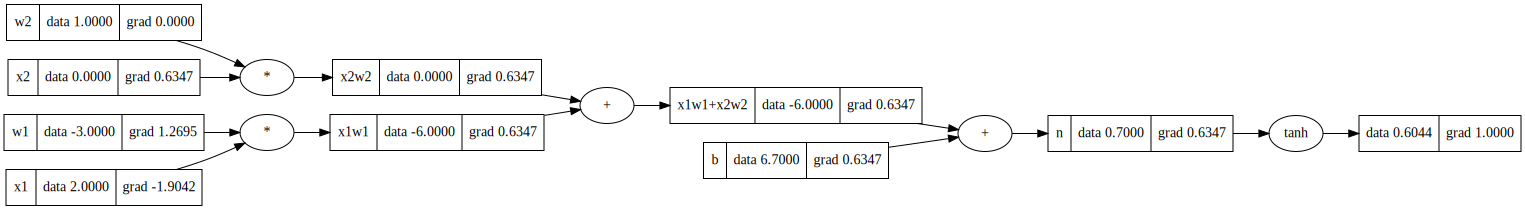

In [ ]:
drawDot(output)

# Topological Sort

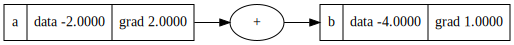

In [8]:

a = Value(-2.0, label='a')
b = a + a; b.label='b'
b.backward()
drawDot(b)

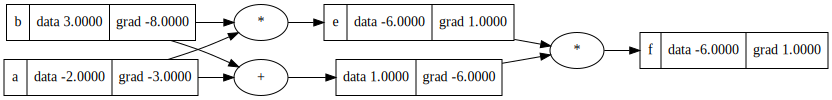

In [10]:

a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label='d'
e = a + b; d.label='e'
f = d * e; f.label='f'

f.backward()
drawDot(f)

In [32]:
a = Value(-3.4)
a.expo()



Value(data=0.03337326996032608)

In [48]:
a = Value(-3.0)
b = Value( 2.3)

a / b
a - b


Value(data=-5.3)

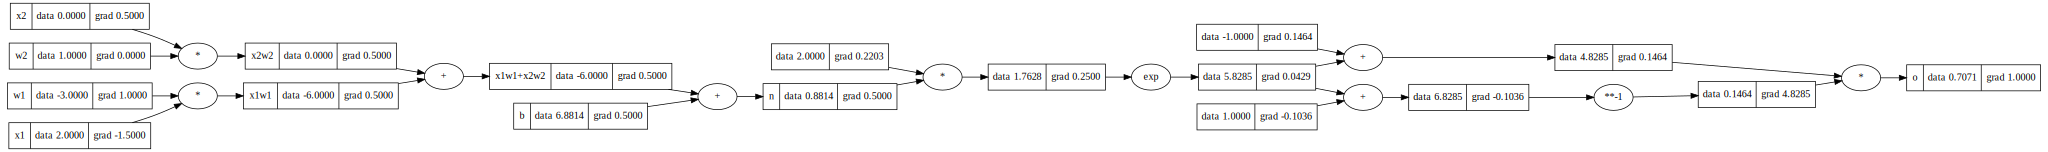

In [62]:
#Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0,label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.881375807195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+x2w2'
n = x1w1x2w2 + b; n.label='n'
output = n.tanh(); label='o'
#
e = (2*n).expo()
o = (e - 1) / (e + 1)
#
o.label='o'
o.backward()
drawDot(o)